In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import seaborn as sns
import copy
import tensorflow as tf


In [2]:
dataf = pd.read_csv("./data/SeoulBikeData.csv", encoding ='ISO-8859-1')
#adding the encoding cause the data has a different encoding other than UTF-8

In [3]:
#having a look at the features, to analyse what features are to be used and what is to be dropeed 
dataf.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [4]:
dataf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [5]:
dataf.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [6]:
#no null values, lets assume that we do not require date, seasons and holiday columns
df = pd.read_csv("./data/SeoulBikeData.csv", encoding = 'ISO-8859-1').drop(["Date", "Holiday", "Seasons"], axis=1)

In [7]:
dataset_cols = ["bike_count", "hour", "temp", "humidity", "wind", "visibility", "dew_pt_temp", "radiation", "rain", "snow", "functional"]
df.columns = dataset_cols

In [8]:
df.head()

,bike_count,hour,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Yes
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Yes


In [9]:
#now as we see functional feature has got data that is categorical, we have to change it to number 1 and 0, that is yes or no
df["functional"].unique()

array(['Yes', 'No'], dtype=object)

In [10]:
df["functional"] = (df["functional"]=="Yes").astype(int)

In [11]:
df.head()

,bike_count,hour,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1


In [12]:
#to make the problem eaiser we would only use the bike_count at noon
df[df["hour"]==12].count()

bike_count     365
hour           365
temp           365
humidity       365
wind           365
visibility     365
dew_pt_temp    365
radiation      365
rain           365
snow           365
functional     365
dtype: int64

In [13]:
(df["hour"] == 12).sum()

365

In [14]:
df = df[df["hour"]==12]

In [15]:
df.head()

,bike_count,hour,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
12,449,12,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,12,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,12,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,12,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,12,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 12 to 8748
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bike_count   365 non-null    int64  
 1   hour         365 non-null    int64  
 2   temp         365 non-null    float64
 3   humidity     365 non-null    int64  
 4   wind         365 non-null    float64
 5   visibility   365 non-null    int64  
 6   dew_pt_temp  365 non-null    float64
 7   radiation    365 non-null    float64
 8   rain         365 non-null    float64
 9   snow         365 non-null    float64
 10  functional   365 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 34.2 KB


In [17]:
#after this we do not really require hour column
df.drop("hour", axis=1, inplace=True)

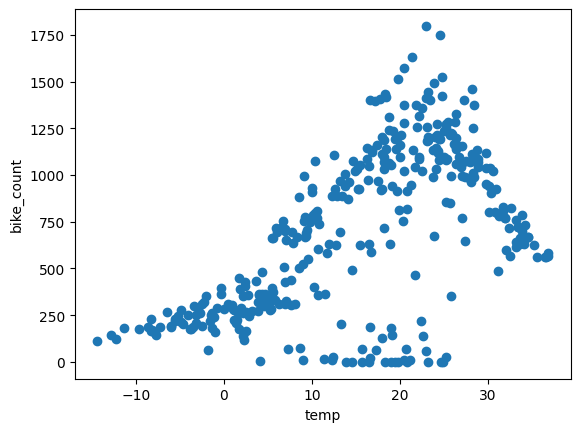

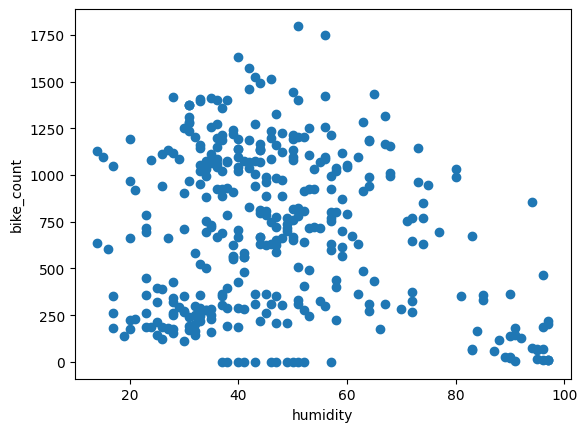

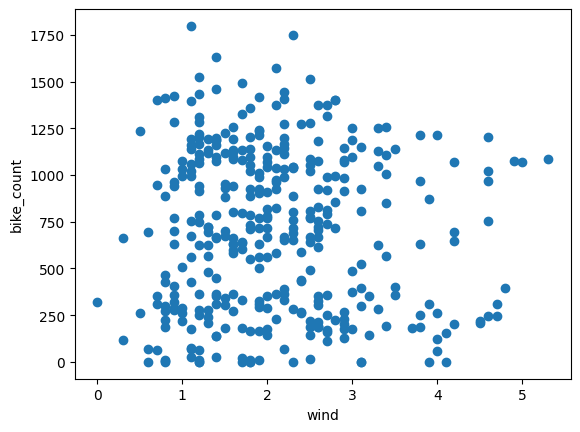

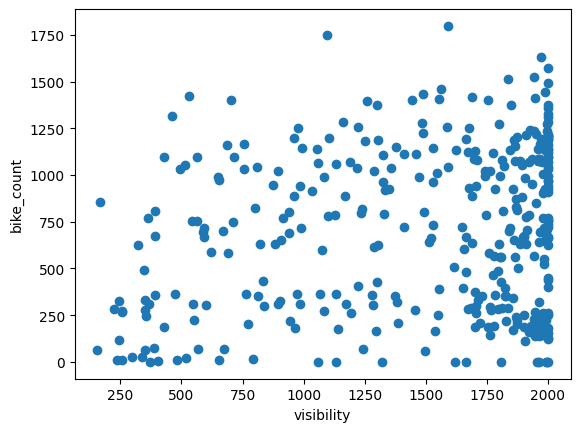

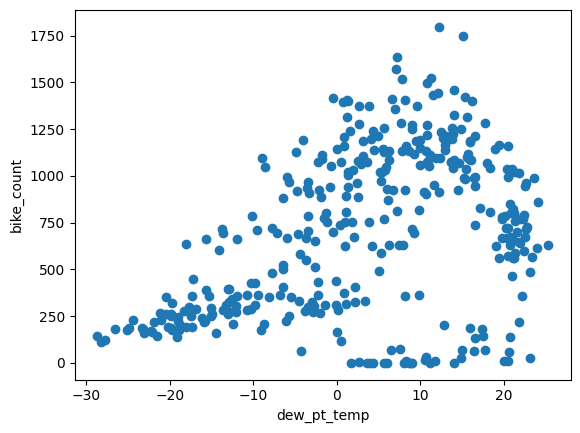

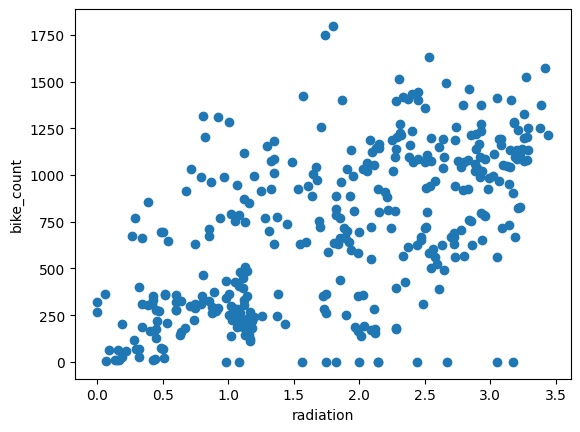

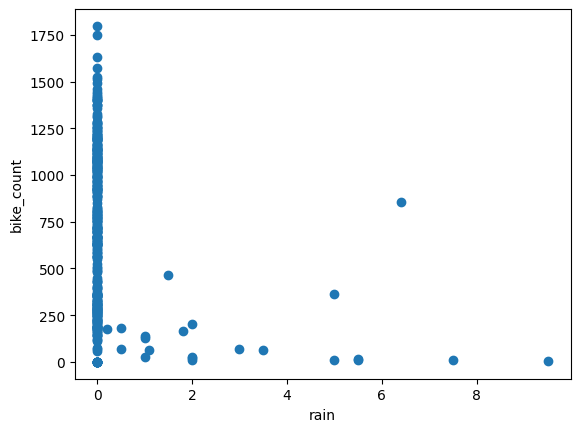

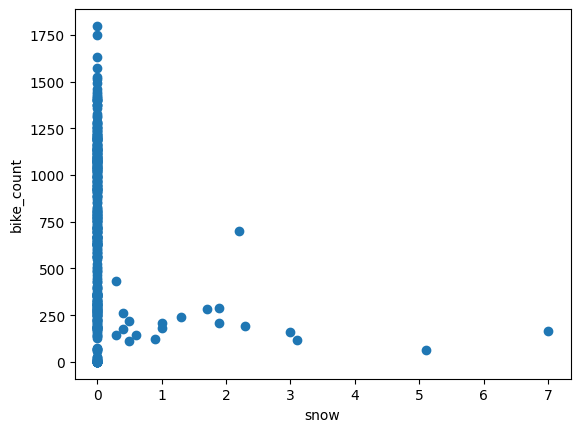

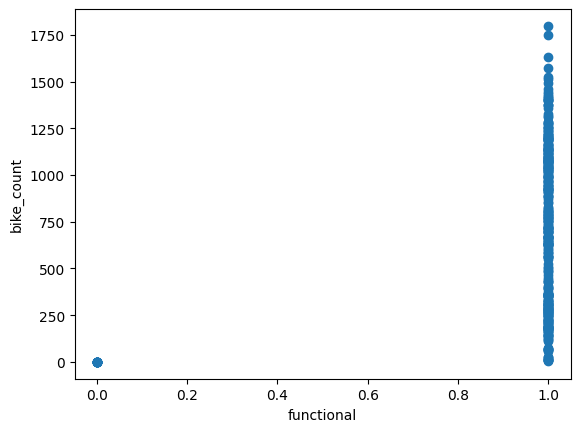

In [18]:
#now we plot a scatter plot to seee what variables show the most important assumption that there should be linearity in the relationship
for cols in df.columns[1:]:
    plt.scatter(df[cols],df["bike_count"])
    plt.xlabel(cols)
    plt.ylabel("bike_count")
    plt.show()

In [19]:
#we drop whatever is suggested first to analyse
df.drop(["wind","visibility","functional"], axis=1)

,bike_count,temp,humidity,dew_pt_temp,radiation,rain,snow
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0
...,...,...,...,...,...,...,...
8652,752,9.1,57,1.0,1.69,0.0,0.0
8676,672,9.3,61,2.1,0.85,0.0,0.0
8700,635,7.9,14,-18.0,1.81,0.0,0.0
8724,661,5.6,27,-11.9,0.34,0.0,0.0


In [20]:
#we deivse a method to get xy for all simple, and multiple regression
def get_xy(dataframe,ylabel,xlabel= None): #to start with it would be none unless you mention it to be one, two or more
    dataframe = copy.deepcopy(dataframe) # creating a deepcopy as we have to use it latee fro multiple linear regression too
    if xlabel is None:
        X = df[xlabel].values
    else:
        if len(xlabel)==1:
            X = df[xlabel[0]].values.reshape(-1,1)   #as we are using scikit learn it requires 2d array to opearte hence we reshape it
        else:
            X = df[xlabel].values
    
    y = df[ylabel].values.reshape(-1,1)  # here reshaping cause we have just got bike_count as a oned single array 
    
    data = np.hstack((X,y))
    return data, X, y

# Simple Regression

In [21]:
#dividing the data into
train, test, valid = np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])

In [22]:
#simple linear regression, only one input variable
_, X_train_temp, y_train_temp = get_xy(train, ylabel="bike_count", xlabel=["temp"])
_, X_val_temp, y_val_temp = get_xy(valid, ylabel="bike_count", xlabel=["temp"])
_, X_test_temp, y_test_temp = get_xy(test, ylabel="bike_count", xlabel=["temp"])

In [23]:
from sklearn.linear_model import LinearRegression
simple_reg = LinearRegression()
simple_reg.fit(X_train_temp, y_train_temp)

LinearRegression()

In [24]:
simple_reg.score(X_test_temp, y_train_temp)

0.330867186499053

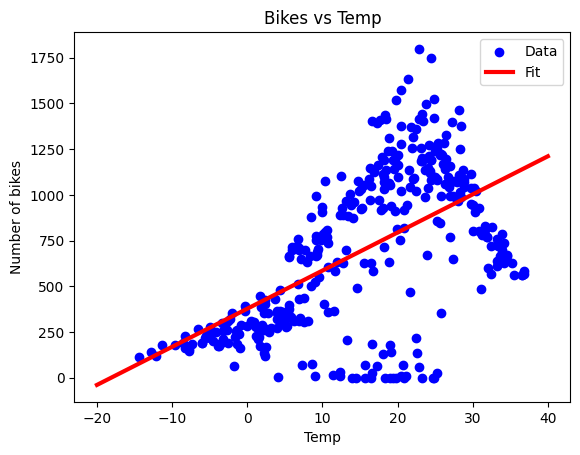

In [25]:
plt.scatter(X_train_temp, y_train_temp, label="Data", color="blue")
x = tf.linspace(-20, 40, 100) # here randomly creating array of 100 values that range from -20 to 40(temperature in this case that are synthetic)
plt.plot(x, simple_reg.predict(np.array(x).reshape(-1, 1)), label="Fit", color="red", linewidth=3)  #here x is served from above created x using tensorflow, we are reshaping x because in this cas its just a 1d array that is temp
plt.legend()
plt.title("Bikes vs Temp")
plt.ylabel("Number of bikes")
plt.xlabel("Temp")
plt.show()

# Multiple Linear Regression

In [27]:
#multiple linear regression
train, test, valid = np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))]) #not needed though
_, X_train_all, y_train_all = get_xy(train, ylabel="bike_count", xlabel=df.columns[1:])
_, X_val_all, y_val_all = get_xy(valid, ylabel="bike_count", xlabel=df.columns[1:])
_, X_test_all, y_test_all = get_xy(test, ylabel="bike_count", xlabel=df.columns[1:])

In [28]:
multiple_regression = LinearRegression()

In [29]:
multiple_regression.fit(X_train_all, y_train_all)

LinearRegression()

In [31]:
multiple_regression.score(X_test_all,y_test_all)

0.6108761705474473

In [32]:
#no scatter plot because multiple dimensions, so try to how to visualise this

# Simple Linear Regression using Neural Net

In [35]:
# we are initializing the normalizer layer so that it can perfrom normalizer to our input
# the input_shape just tells that the 
#input is only one feature temperature, since the values for temp and bike_count are not on the same scale we 
#normalize it, axis=None states that do that normalization across all inputs(temp in this case)
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,),axis= None) 
temp_normalizer.adapt(X_train_temp.reshape(-1)) #reshaping cause again its it just a 1d column right now we want it as 2d
# we need not normalize the target variable cause its quiet evident that we are not going to use it for predictions 

2024-10-12 07:55:25.705520: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


In [37]:
# why are we putting in the noarmlizer layer here if we have already noramlised the data, but here 
#  only the training data is guarenteed to be normalized, but whatever testing/unseen data comes in the future wont be normalised
temp_nn_model = tf.keras.Sequential([
    temp_normalizer, 
    tf.keras.layers.Dense(1) # just creating one dense layer, because one input and no activation fucntion means it a linear function 
])

In [56]:
temp_nn_model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.1), loss='mean_squared_error')

In [57]:
history = temp_nn_model.fit(
                            X_train_temp.reshape(-1,), y_train_temp, # here only the temperature is converted to a vector using reshape cause the model expect the input to be 2d but not the target
                            epochs = 1000,
                            #verbose = 0, #commenting this to see what is hapenning
                            validation_data = (X_val_temp, y_val_temp)
    )

Epoch 1/1000
12/12 [==============================] - 0s 5ms/step - loss: 449726.8750 - val_loss: 448835.9375
Epoch 2/1000
12/12 [==============================] - 0s 2ms/step - loss: 448156.6250 - val_loss: 447262.2500
Epoch 3/1000
12/12 [==============================] - 0s 2ms/step - loss: 446606.7188 - val_loss: 445673.8750
Epoch 4/1000
12/12 [==============================] - 0s 2ms/step - loss: 445028.5938 - val_loss: 444144.7812
Epoch 5/1000
12/12 [==============================] - 0s 2ms/step - loss: 443484.1875 - val_loss: 442603.7188
Epoch 6/1000
12/12 [==============================] - 0s 2ms/step - loss: 441923.5625 - val_loss: 441091.8438
Epoch 7/1000
12/12 [==============================] - 0s 2ms/step - loss: 440409.3750 - val_loss: 439575.2188
Epoch 8/1000
12/12 [==============================] - 0s 1ms/step - loss: 438897.4375 - val_loss: 438035.1562
Epoch 9/1000
12/12 [==============================] - 0s 1ms/step - loss: 437355.5312 - val_loss: 436537.9062
Epoch 10/1

Epoch 75/1000
12/12 [==============================] - 0s 2ms/step - loss: 351122.2188 - val_loss: 350470.7812
Epoch 76/1000
12/12 [==============================] - 0s 1ms/step - loss: 349990.1250 - val_loss: 349348.3750
Epoch 77/1000
12/12 [==============================] - 0s 1ms/step - loss: 348872.4062 - val_loss: 348235.3438
Epoch 78/1000
12/12 [==============================] - 0s 1ms/step - loss: 347761.6250 - val_loss: 347144.3438
Epoch 79/1000
12/12 [==============================] - 0s 1ms/step - loss: 346673.2812 - val_loss: 346022.1875
Epoch 80/1000
12/12 [==============================] - 0s 1ms/step - loss: 345553.5000 - val_loss: 344931.2812
Epoch 81/1000
12/12 [==============================] - 0s 1ms/step - loss: 344465.1250 - val_loss: 343839.9688
Epoch 82/1000
12/12 [==============================] - 0s 1ms/step - loss: 343370.1250 - val_loss: 342774.7812
Epoch 83/1000
12/12 [==============================] - 0s 1ms/step - loss: 342299.9062 - val_loss: 341673.4375
E

12/12 [==============================] - 0s 1ms/step - loss: 280077.2812 - val_loss: 279585.5625
Epoch 149/1000
12/12 [==============================] - 0s 2ms/step - loss: 279217.4375 - val_loss: 278764.1875
Epoch 150/1000
12/12 [==============================] - 0s 1ms/step - loss: 278408.2812 - val_loss: 277915.2188
Epoch 151/1000
12/12 [==============================] - 0s 1ms/step - loss: 277564.9375 - val_loss: 277079.6250
Epoch 152/1000
12/12 [==============================] - 0s 1ms/step - loss: 276704.8750 - val_loss: 276256.1250
Epoch 153/1000
12/12 [==============================] - 0s 2ms/step - loss: 275905.0625 - val_loss: 275400.5312
Epoch 154/1000
12/12 [==============================] - 0s 1ms/step - loss: 275065.8750 - val_loss: 274584.1250
Epoch 155/1000
12/12 [==============================] - 0s 1ms/step - loss: 274239.5312 - val_loss: 273791.0000
Epoch 156/1000
12/12 [==============================] - 0s 1ms/step - loss: 273433.6562 - val_loss: 273003.6250
Epoch 1

12/12 [==============================] - 0s 2ms/step - loss: 227006.3125 - val_loss: 226662.1562
Epoch 222/1000
12/12 [==============================] - 0s 1ms/step - loss: 226391.1406 - val_loss: 226025.8594
Epoch 223/1000
12/12 [==============================] - 0s 1ms/step - loss: 225762.7031 - val_loss: 225408.4375
Epoch 224/1000
12/12 [==============================] - 0s 1ms/step - loss: 225133.3281 - val_loss: 224795.2812
Epoch 225/1000
12/12 [==============================] - 0s 1ms/step - loss: 224512.5312 - val_loss: 224153.7812
Epoch 226/1000
12/12 [==============================] - 0s 1ms/step - loss: 223876.7969 - val_loss: 223541.9219
Epoch 227/1000
12/12 [==============================] - 0s 1ms/step - loss: 223269.9844 - val_loss: 222924.8281
Epoch 228/1000
12/12 [==============================] - 0s 1ms/step - loss: 222671.6875 - val_loss: 222317.0469
Epoch 229/1000
12/12 [==============================] - 0s 1ms/step - loss: 222056.9844 - val_loss: 221714.4531
Epoch 2

12/12 [==============================] - 0s 1ms/step - loss: 187637.2812 - val_loss: 187377.6719
Epoch 295/1000
12/12 [==============================] - 0s 1ms/step - loss: 187179.0625 - val_loss: 186930.2188
Epoch 296/1000
12/12 [==============================] - 0s 1ms/step - loss: 186733.9219 - val_loss: 186479.1250
Epoch 297/1000
12/12 [==============================] - 0s 1ms/step - loss: 186292.4219 - val_loss: 186026.2812
Epoch 298/1000
12/12 [==============================] - 0s 1ms/step - loss: 185833.7812 - val_loss: 185589.4375
Epoch 299/1000
12/12 [==============================] - 0s 2ms/step - loss: 185410.5156 - val_loss: 185131.0938
Epoch 300/1000
12/12 [==============================] - 0s 1ms/step - loss: 184939.9062 - val_loss: 184699.9844
Epoch 301/1000
12/12 [==============================] - 0s 1ms/step - loss: 184504.2812 - val_loss: 184253.3438
Epoch 302/1000
12/12 [==============================] - 0s 2ms/step - loss: 184059.0312 - val_loss: 183802.4844
Epoch 3

12/12 [==============================] - 0s 1ms/step - loss: 159788.2500 - val_loss: 159606.5312
Epoch 368/1000
12/12 [==============================] - 0s 1ms/step - loss: 159478.6250 - val_loss: 159306.7500
Epoch 369/1000
12/12 [==============================] - 0s 1ms/step - loss: 159164.3594 - val_loss: 159002.0469
Epoch 370/1000
12/12 [==============================] - 0s 1ms/step - loss: 158861.3281 - val_loss: 158686.0625
Epoch 371/1000
12/12 [==============================] - 0s 1ms/step - loss: 158558.0781 - val_loss: 158369.5781
Epoch 372/1000
12/12 [==============================] - 0s 1ms/step - loss: 158246.6562 - val_loss: 158080.3906
Epoch 373/1000
12/12 [==============================] - 0s 1ms/step - loss: 157955.6094 - val_loss: 157789.9219
Epoch 374/1000
12/12 [==============================] - 0s 2ms/step - loss: 157667.6719 - val_loss: 157493.7812
Epoch 375/1000
12/12 [==============================] - 0s 2ms/step - loss: 157365.7188 - val_loss: 157202.0312
Epoch 3

12/12 [==============================] - 0s 1ms/step - loss: 141524.4375 - val_loss: 141411.1719
Epoch 441/1000
12/12 [==============================] - 0s 2ms/step - loss: 141321.9219 - val_loss: 141226.6094
Epoch 442/1000
12/12 [==============================] - 0s 1ms/step - loss: 141138.9062 - val_loss: 141027.2500
Epoch 443/1000
12/12 [==============================] - 0s 2ms/step - loss: 140940.7031 - val_loss: 140838.2031
Epoch 444/1000
12/12 [==============================] - 0s 1ms/step - loss: 140762.6094 - val_loss: 140640.3281
Epoch 445/1000
12/12 [==============================] - 0s 2ms/step - loss: 140573.7344 - val_loss: 140461.7500
Epoch 446/1000
12/12 [==============================] - 0s 2ms/step - loss: 140384.5625 - val_loss: 140285.5156
Epoch 447/1000
12/12 [==============================] - 0s 2ms/step - loss: 140206.5000 - val_loss: 140100.5312
Epoch 448/1000
12/12 [==============================] - 0s 2ms/step - loss: 140020.5312 - val_loss: 139910.2344
Epoch 4

12/12 [==============================] - 0s 1ms/step - loss: 131004.3047 - val_loss: 130942.8906
Epoch 514/1000
12/12 [==============================] - 0s 2ms/step - loss: 130902.0312 - val_loss: 130840.0859
Epoch 515/1000
12/12 [==============================] - 0s 1ms/step - loss: 130800.5078 - val_loss: 130738.9453
Epoch 516/1000
12/12 [==============================] - 0s 2ms/step - loss: 130696.8438 - val_loss: 130633.8750
Epoch 517/1000
12/12 [==============================] - 0s 2ms/step - loss: 130597.3281 - val_loss: 130537.8750
Epoch 518/1000
12/12 [==============================] - 0s 1ms/step - loss: 130503.1797 - val_loss: 130440.9062
Epoch 519/1000
12/12 [==============================] - 0s 1ms/step - loss: 130407.5156 - val_loss: 130347.5703
Epoch 520/1000
12/12 [==============================] - 0s 1ms/step - loss: 130310.6719 - val_loss: 130256.8359
Epoch 521/1000
12/12 [==============================] - 0s 1ms/step - loss: 130215.8359 - val_loss: 130162.8047
Epoch 5

12/12 [==============================] - 0s 1ms/step - loss: 126000.5703 - val_loss: 125974.2656
Epoch 587/1000
12/12 [==============================] - 0s 2ms/step - loss: 125954.2656 - val_loss: 125932.4844
Epoch 588/1000
12/12 [==============================] - 0s 1ms/step - loss: 125914.4844 - val_loss: 125895.1250
Epoch 589/1000
12/12 [==============================] - 0s 1ms/step - loss: 125879.2109 - val_loss: 125858.8750
Epoch 590/1000
12/12 [==============================] - 0s 1ms/step - loss: 125838.9688 - val_loss: 125813.8203
Epoch 591/1000
12/12 [==============================] - 0s 1ms/step - loss: 125793.2578 - val_loss: 125773.9297
Epoch 592/1000
12/12 [==============================] - 0s 1ms/step - loss: 125761.1172 - val_loss: 125728.2500
Epoch 593/1000
12/12 [==============================] - 0s 1ms/step - loss: 125712.4844 - val_loss: 125698.9844
Epoch 594/1000
12/12 [==============================] - 0s 1ms/step - loss: 125689.6094 - val_loss: 125657.3516
Epoch 5

12/12 [==============================] - 0s 2ms/step - loss: 124258.8516 - val_loss: 124253.4375
Epoch 660/1000
12/12 [==============================] - 0s 2ms/step - loss: 124252.4922 - val_loss: 124242.8047
Epoch 661/1000
12/12 [==============================] - 0s 1ms/step - loss: 124241.0703 - val_loss: 124231.8594
Epoch 662/1000
12/12 [==============================] - 0s 2ms/step - loss: 124239.0391 - val_loss: 124221.1250
Epoch 663/1000
12/12 [==============================] - 0s 2ms/step - loss: 124223.1094 - val_loss: 124218.6641
Epoch 664/1000
12/12 [==============================] - 0s 2ms/step - loss: 124219.1562 - val_loss: 124210.5078
Epoch 665/1000
12/12 [==============================] - 0s 1ms/step - loss: 124208.4062 - val_loss: 124202.8203
Epoch 666/1000
12/12 [==============================] - 0s 1ms/step - loss: 124200.1016 - val_loss: 124195.9766
Epoch 667/1000
12/12 [==============================] - 0s 2ms/step - loss: 124192.3359 - val_loss: 124188.6016
Epoch 6

12/12 [==============================] - 0s 2ms/step - loss: 123874.2266 - val_loss: 123870.5547
Epoch 733/1000
12/12 [==============================] - 0s 2ms/step - loss: 123871.8984 - val_loss: 123869.5781
Epoch 734/1000
12/12 [==============================] - 0s 2ms/step - loss: 123874.2578 - val_loss: 123866.6719
Epoch 735/1000
12/12 [==============================] - 0s 1ms/step - loss: 123867.3672 - val_loss: 123865.3516
Epoch 736/1000
12/12 [==============================] - 0s 2ms/step - loss: 123866.5859 - val_loss: 123865.6016
Epoch 737/1000
12/12 [==============================] - 0s 1ms/step - loss: 123867.4219 - val_loss: 123863.8594
Epoch 738/1000
12/12 [==============================] - 0s 1ms/step - loss: 123865.0625 - val_loss: 123862.1250
Epoch 739/1000
12/12 [==============================] - 0s 2ms/step - loss: 123863.0547 - val_loss: 123858.7266
Epoch 740/1000
12/12 [==============================] - 0s 2ms/step - loss: 123858.7188 - val_loss: 123856.9062
Epoch 7

12/12 [==============================] - 0s 2ms/step - loss: 123817.6562 - val_loss: 123815.1562
Epoch 806/1000
12/12 [==============================] - 0s 1ms/step - loss: 123816.7422 - val_loss: 123815.0000
Epoch 807/1000
12/12 [==============================] - 0s 1ms/step - loss: 123816.5781 - val_loss: 123814.7578
Epoch 808/1000
12/12 [==============================] - 0s 1ms/step - loss: 123817.3828 - val_loss: 123815.0469
Epoch 809/1000
12/12 [==============================] - 0s 2ms/step - loss: 123816.4297 - val_loss: 123815.4375
Epoch 810/1000
12/12 [==============================] - 0s 1ms/step - loss: 123819.2578 - val_loss: 123815.1016
Epoch 811/1000
12/12 [==============================] - 0s 2ms/step - loss: 123816.5703 - val_loss: 123815.2578
Epoch 812/1000
12/12 [==============================] - 0s 1ms/step - loss: 123816.5078 - val_loss: 123815.2344
Epoch 813/1000
12/12 [==============================] - 0s 2ms/step - loss: 123817.6016 - val_loss: 123815.3984
Epoch 8

12/12 [==============================] - 0s 2ms/step - loss: 123814.5000 - val_loss: 123809.3516
Epoch 879/1000
12/12 [==============================] - 0s 2ms/step - loss: 123813.0000 - val_loss: 123809.3672
Epoch 880/1000
12/12 [==============================] - 0s 2ms/step - loss: 123810.4766 - val_loss: 123808.9844
Epoch 881/1000
12/12 [==============================] - 0s 2ms/step - loss: 123809.7656 - val_loss: 123808.8359
Epoch 882/1000
12/12 [==============================] - 0s 1ms/step - loss: 123810.1797 - val_loss: 123808.8516
Epoch 883/1000
12/12 [==============================] - 0s 1ms/step - loss: 123810.1172 - val_loss: 123808.8516
Epoch 884/1000
12/12 [==============================] - 0s 2ms/step - loss: 123811.1016 - val_loss: 123808.8125
Epoch 885/1000
12/12 [==============================] - 0s 2ms/step - loss: 123813.6328 - val_loss: 123808.5625
Epoch 886/1000
12/12 [==============================] - 0s 2ms/step - loss: 123809.6953 - val_loss: 123808.5781
Epoch 8

12/12 [==============================] - 0s 2ms/step - loss: 123817.2031 - val_loss: 123808.5703
Epoch 952/1000
12/12 [==============================] - 0s 2ms/step - loss: 123814.8203 - val_loss: 123808.6484
Epoch 953/1000
12/12 [==============================] - 0s 1ms/step - loss: 123811.6094 - val_loss: 123808.3281
Epoch 954/1000
12/12 [==============================] - 0s 2ms/step - loss: 123811.5625 - val_loss: 123808.3516
Epoch 955/1000
12/12 [==============================] - 0s 1ms/step - loss: 123814.1953 - val_loss: 123808.4922
Epoch 956/1000
12/12 [==============================] - 0s 1ms/step - loss: 123815.5078 - val_loss: 123808.2266
Epoch 957/1000
12/12 [==============================] - 0s 1ms/step - loss: 123811.8672 - val_loss: 123808.1953
Epoch 958/1000
12/12 [==============================] - 0s 1ms/step - loss: 123814.3594 - val_loss: 123808.3594
Epoch 959/1000
12/12 [==============================] - 0s 2ms/step - loss: 123810.3438 - val_loss: 123808.4375
Epoch 9

In [62]:
def plot_loss(history):
    plt.plot(history.history['val_loss'], label = "validation_loss") #validation loss
    plt.plot(history.history['loss'], label ="loss") #loss from the model itself
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.legend()
    plt.grid(True) #wanting grids in the plot seen below
    plt.show()

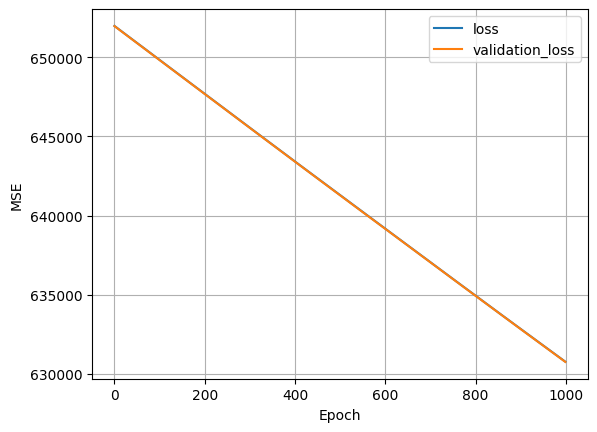

In [52]:
plot_loss(history)

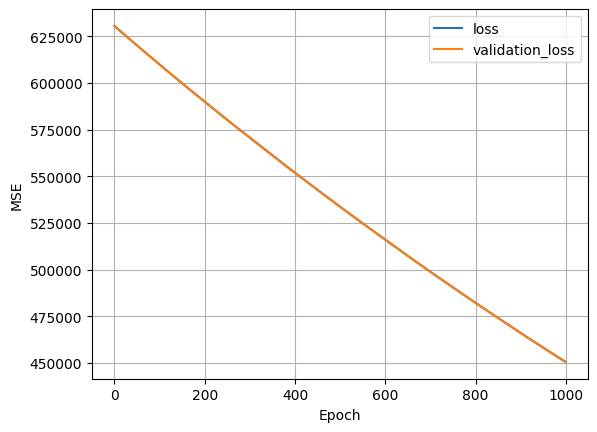

In [55]:
# recording the mistake that I have done here, have kept the learning rate very low and since then the model is 
# learning very slowly or 
# this can be the case :The data might not be well-scaled or normalized, despite using a normalization layer. 
# Ensure that the features (in this case, temp) are properly scaled, as large feature values can lead to large losses.
# increasing the learning rate, and then plotting(learning_rate=0.01 from 0.001)
plot_loss(history)

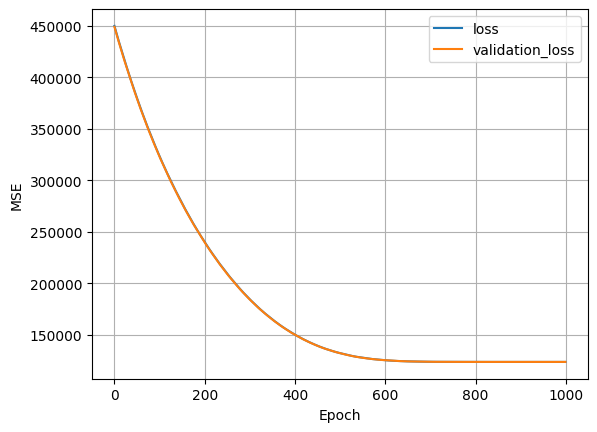

In [58]:
# still no conversion so increasing the learning rate here to 0.1 and then plotting
plot_loss(history)

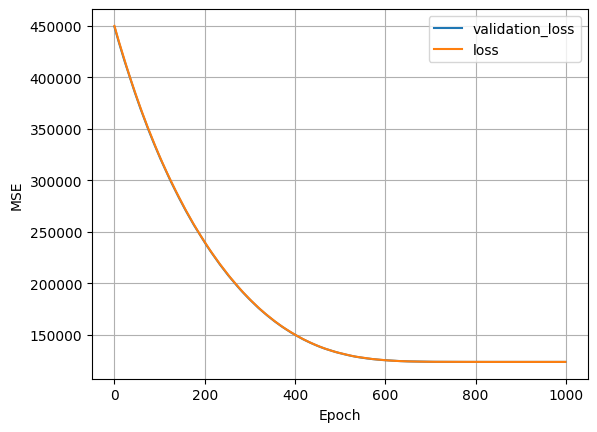

In [63]:
# cannot see much difference in the plots for loss and validation loss, so jsut plotting the loss before validation
# loss as it could be seen on the graph
plot_loss(history)

In [ ]:
# The model's training loss (loss) and validation loss (val_loss) are converging to nearly the same value, 
# indicating that the model is fitting well to both the training and validation data. This is usually a good sign,
# as it suggests that the model is not overfitting or underfitting significantly.
# Since the two lines are so close to each other, even if we try to plot one line first (validation loss), 
# both lines overlap almost perfectly. That's why we don't see the blue line clearly on top. 
# This is due to the very small difference between the values of loss and val_loss, which results in the graph appearing to show just one line.

4/4 [==============================] - 0s 583us/step


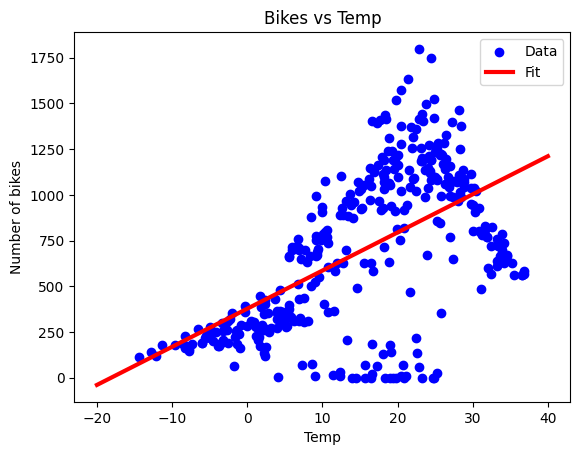

In [64]:
plt.scatter(X_train_temp, y_train_temp, label="Data", color="blue")
x = tf.linspace(-20, 40, 100) # here randomly creating array of 100 values that range from -20 to 40(temperature in this case that are synthetic)
plt.plot(x, temp_nn_model.predict(np.array(x).reshape(-1, 1)), label="Fit", color="red", linewidth=3)  #here x is served from above created x using tensorflow, we are reshaping x because in this cas its just a 1d array that is temp
plt.legend()
plt.title("Bikes vs Temp")
plt.ylabel("Number of bikes")
plt.xlabel("Temp")
plt.show()

In [70]:
# Multiple Linear Regression using Neural Net
multiple_normalizer = tf.keras.layers.Normalization(input_shape=(6,), axis= None)
multiple_normalizer.adapt(X_train_all)

In [73]:
multiple_nn_model = tf.keras.Sequential([
    multiple_normalizer,
    tf.keras.layers.Dense(1)
])

In [74]:
multiple_nn_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.1), loss = "mean_squared_error")

In [78]:
multiple_history = multiple_nn_model.fit(
    X_train_all, 
    y_train_all,
    epochs = 1000,
    validation_data = (X_val_all, y_val_all),
    verbose = 1
)

Epoch 1/1000


ValueError: in user code:

    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/engine/training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/engine/training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/engine/training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/engine/training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/engine/input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_2" is incompatible with the layer: expected shape=(None, 6), found shape=(None, 9)


In [83]:
print(X_train_all.shape)

(365, 9)
